In [6]:
import numpy
import requests
numpy.__version__

'1.16.3'

In [14]:
import io
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

session = 1
name = "Jean Dupont"

def get_binary_image(plt_obj):
    with io.BytesIO() as buffer:
        plt_obj.savefig(buffer, format='jpeg', quality=20, dpi=70)
        return buffer.getvalue()

def send(data, q_nb):
    url = "http://localhost:50000/add-record"
    file = {}
    form = {'session_id': session, 'sender_name': name, 'question_nb': q_nb}

    datatype = type(data).__name__
    if datatype == "ndarray":
        form['type'] = datatype
        form['data'] = json.dumps(data.tolist())
    elif datatype == "module" and data.__name__ == "matplotlib.pyplot":
        form['type'] = 'image'
        file['file'] = get_binary_image(data)
    else:
        form['type'] = datatype
        form['data'] = data
        
    response = requests.post(url, data=form, files=file)
    print(response.content.decode())
    return response

A = np.random.rand(25).reshape(5,5)
# A = np.random.randint(0, 10, size=25).reshape(5,5)
# A = "Test - <script>prompt('Hello !')</script>\nThis is a super long sentence ... - \nThis is a super long sentence ... - \nThis is a super long sentence ... - \nThis is a super long sentence ... - "
print(A)
r = send(A, 1)

[[0.15478988 0.18229206 0.89940498 0.62864771 0.98599406]
 [0.83058246 0.36972328 0.46436131 0.77749692 0.43352279]
 [0.38207248 0.08570937 0.76100376 0.59243752 0.58095373]
 [0.59408248 0.64219391 0.24350545 0.79432305 0.01490471]
 [0.0778908  0.96261236 0.81743506 0.06034306 0.13064919]]
Success: Record inserted


In [20]:
for i in range(10):
    for j in range([5,3,4,1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 3, 1][i]):
        session = 1
        A = np.random.randint(0, 10, size=9).reshape(3,3)
#         A = "Inser " + str(i) + ' - ' + str(j)
        name = "Max dupont %d" % j
        send(A, i)

b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'
b'Success: Record inserted'


### Auto fetch sending code

In [23]:
import requests

exec(requests.get("http://localhost:50000/get-send-code").content)

name = input("Name:")
session = input('Session:')

Name: evann
Session: 1


In [24]:
A = np.random.randint(0, 10, size=9).reshape(3,3)
send(A, 1)
A = "Une string"
send(A, 2)
A = 42
send(A, 3)

Success: Record inserted
Success: Record inserted
Error: DataType is not supported


<Response [400]>

In [3]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10), np.random.rand(10))
plt.title("test")
send(plt, 4);

Success: Record inserted


### Compress data before send

In [4]:
import numpy as np
import zlib, io

def send(data, q_nb):
    url = "http://courdier.pythonanywhere.com/add-record"
    datatype = type(data).__name__
    if datatype == "ndarray":
        data = compress(data)
    elif datatype == "str":
        data = data.encode()
    headers = {'session_id': session, 'sender_name': name, 'question_nb': q_nb, 'type': datatype, 'Content-Type': 'application/octet-stream'}
    response = requests.post(url, data=data, headers=headers)
    print(response.content)

def compress(array):
    bytestream = io.BytesIO()
    np.save(bytestream, nparr)
    return zlib.compress(bytestream.getvalue())


def uncompress(bytestring):
    return np.load(io.BytesIO(zlib.decompress(bytestring)))

### Send image

In [94]:
import io
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

session = 9
name = "Jean Dupont"

def get_binary_image(plt_obj):
    with io.BytesIO() as buffer:
        plt_obj.savefig(buffer, format='jpeg', quality=20, dpi=70)
        return buffer.getvalue()

def send(data, q_nb):
    url = "http://courdier.pythonanywhere.com/add-record"
    file = {}
    form = {'session_id': session, 'sender_name': name, 'question_nb': q_nb}

    datatype = type(data).__name__
    if datatype == "ndarray":
        form['type'] = datatype
        form['data'] = json.dumps(data.tolist())
    elif datatype == "module" and data.__name__ == "matplotlib.pyplot":
        form['type'] = 'image'
        file['file'] = get_binary_image(data)
    else:
        form['type'] = datatype
        form['data'] = data
        
    response = requests.post(url, data=form, files=file)
    print(response.content.decode())
    return response

Success: Record updated


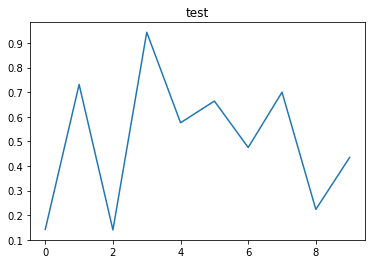

In [95]:
plt.plot(np.arange(10), np.random.rand(10))
plt.title("test")
a = send(plt, 2)